In [21]:
#importing required libraries
from skimage.measure import compare_ssim
from skimage.metrics import structural_similarity
import imutils
import cv2

import matplotlib.pyplot as plt

In [ ]:
#loading the images into the notebook
from google.colab import files
files.upload()

In [3]:
img1 = cv2.imread("moreart.jpg")
img2 = cv2.imread("moreart2.jpg")

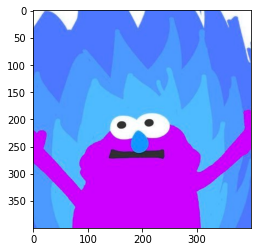

In [4]:
plt.imshow(img1)

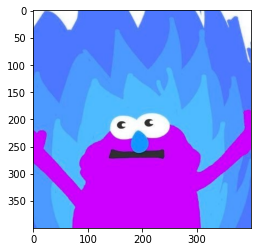

In [5]:
plt.imshow(img2)

 SSIM score = 0.9867195433690737


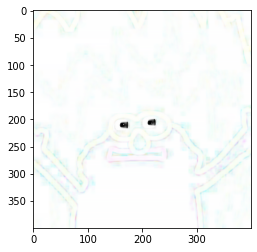

In [22]:
#resizing the image
img1 = cv2.resize(img1, (400,400))
img2 = cv2.resize(img2, (400,400))

#calculating the structural similarity index and getting the diff image 
(score, diff) = structural_similarity(img1, img2, full=True, multichannel=True)
diff = (diff*255).astype('uint8')
print(' SSIM score = {}'.format(score))
plt.imshow(diff)

Similarity score from ORB is 0.9890510948905109


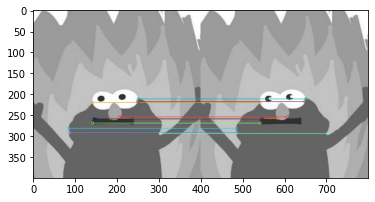

(<matplotlib.image.AxesImage at 0x7f4f3b6afd90>, None)

In [24]:
#grayscaling images
grayimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#initiating ORB detector
orb = cv2.ORB_create()

#finding keypoints and detectors for both images
kpt1, desc1 = orb.detectAndCompute(grayimg1,None)
kpt2, desc2 = orb.detectAndCompute(grayimg2,None)

#defining BF matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

#matching descriptors of the images
matches = bf.match(desc1, desc2)

#sorting by order of distance
matches = sorted(matches, key = lambda x:x.distance)

#getting similarity percentage
sim_reg = [i for i in matches if i.distance < 50]
if len(matches) == 0:
  sim_score = 0
else:
  sim_score = len(sim_reg)/len(matches)

#displaying first 10 matches
img3 = cv2.drawMatches(grayimg1,kpt1,grayimg2,kpt2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
print("Similarity score from ORB is {}".format(sim_score))
plt.imshow(img3),plt.show()

#Creating bbox

In [ ]:
grayimg1 = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

#thresholding the difference image
thresh = cv2.threshold(grayimg1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
#getting the contours
contr = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contr = imutils.grab_contours(contr)
#looping through the contours
for c in contr:
  x, y, width, height = cv2.boundingRect(c)
  cv2.rectangle(img1, (x, y), (x + width, y + height), (255, 0, 0), 2)
  cv2.rectangle(img2, (x, y), (x + width, y + height), (255, 0, 0), 2)

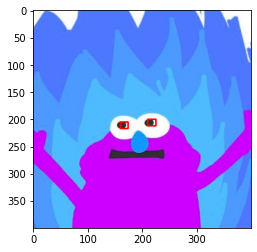

In [ ]:
plt.imshow(img1)

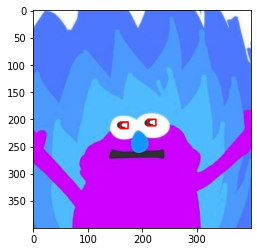

In [ ]:
plt.imshow(img2)